In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
beans = pd.read_csv('/content/drive/MyDrive/Dry_Bean_Dataset.csv')
beans.head(20)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


###**Data Preprocessing**

In [ ]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

###**DATA VISUALIZATION**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

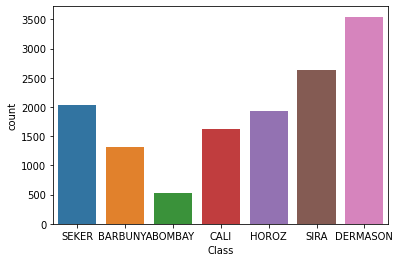

In [ ]:
#Beans class label distribution

sns.countplot(beans['Class'])
beans['Class'].value_counts()

In [ ]:
class_ = {'DERMASON':0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6}
beans['Class'] = beans['Class'].replace(class_)

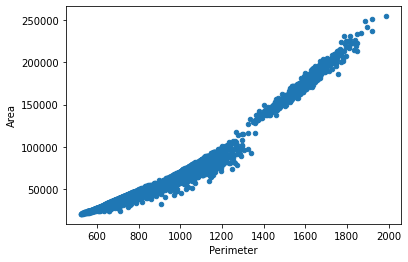

In [ ]:
beans.plot(kind="scatter", x="Perimeter", y="Area")

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


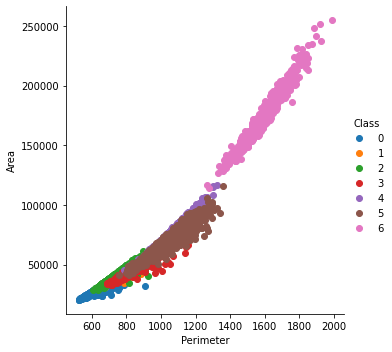

In [ ]:
sns.FacetGrid(beans, hue="Class", size=5).map(plt.scatter, "Perimeter", "Area").add_legend()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


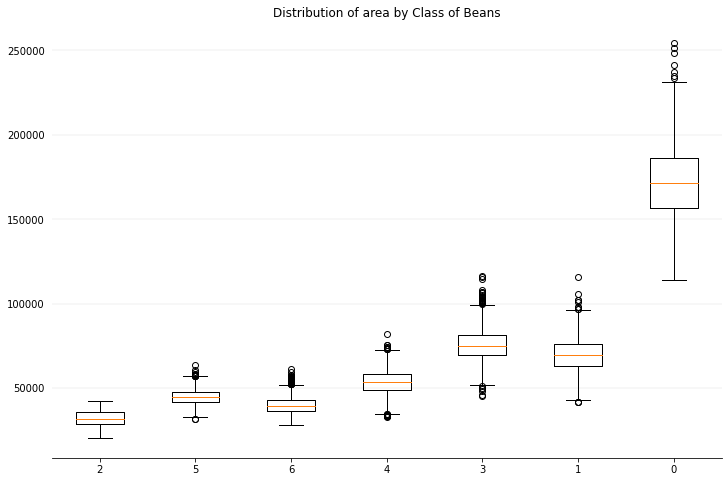

In [ ]:
# Prepare area by class datasets
dermason_area = beans[beans['Class'] == 0]['Area']
sira_area = beans[beans['Class'] == 1]['Area']
seker_area = beans[beans['Class'] == 2]['Area']
horoz_area = beans[beans['Class'] == 3]['Area']
cali_area = beans[beans['Class'] == 4]['Area']
barbunya_area = beans[beans['Class'] == 5]['Area']
bombay_area  = beans[beans['Class'] == 6]['Area']

fig, ax = plt.subplots(figsize=(12, 8))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Distribution of area by Class of Beans')
# Set species names as labels for the boxplot
dataset = [dermason_area, sira_area, seker_area, horoz_area, cali_area, barbunya_area, bombay_area]
labels = beans['Class'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()

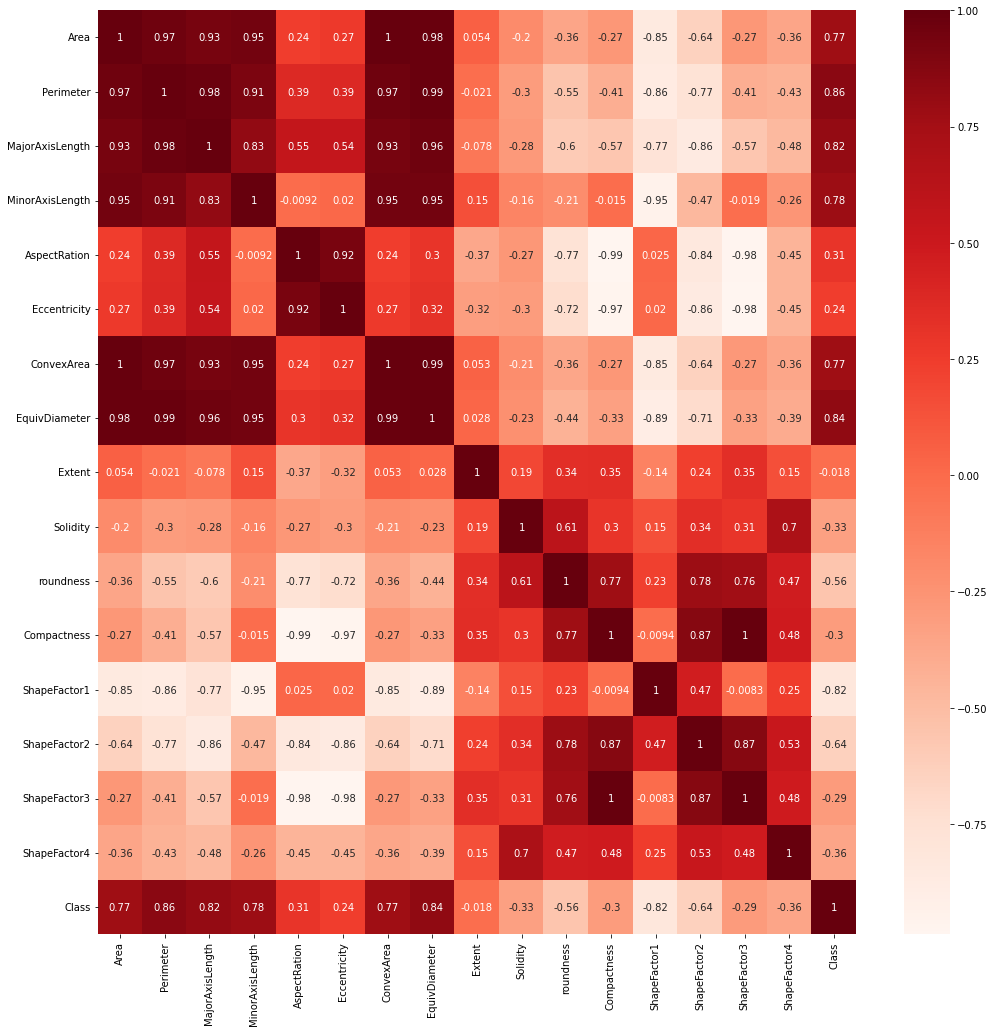

In [ ]:
plt.figure(figsize=(17,17))
cor = beans.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

###**Building a ML Model**

In [ ]:
#RandomForest Classifier Model

def classifier(x_train_set,y_train_set,x_test_set,y_test_set):
  RandomForestClassifierModel = RandomForestClassifier(criterion='gini', max_depth=11, n_estimators=100, random_state=44)
  Model = RandomForestClassifierModel.fit(x_train_set,y_train_set)
  return Model


In [ ]:
X = beans.drop(columns='Class')
y = beans['Class']

In [ ]:
X.shape

(13611, 16)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True)

In [ ]:
X_train.shape

(9527, 16)

In [ ]:
X_test.shape

(4084, 16)

In [ ]:
Model = classifier(X_train,y_train,X_test,y_test)

print("Train score is: ",Model.score(X_train,y_train)*100)
print("Test score is:",Model.score(X_test,y_test)*100)

Train score is:  97.78524194394878
Test score is: 92.18903036238981


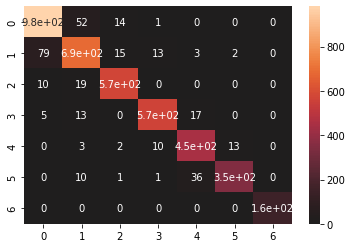


Confusion Matrix:

 [[982  52  14   1   0   0   0]
 [ 79 686  15  13   3   2   0]
 [ 10  19 573   0   0   0   0]
 [  5  13   0 566  17   0   0]
 [  0   3   2  10 450  13   0]
 [  0  10   1   1  36 352   0]
 [  0   0   0   0   0   0 156]]


In [ ]:
y_pred = Model.predict(X_test)
CM = confusion_matrix(y_test,y_pred)

sns.heatmap(CM,center=True,annot=True)
plt.show()

print("\nConfusion Matrix:\n\n",CM)

### **Feature Selection**



In [ ]:
#Feature Selection

FeatureSelection = SelectKBest(score_func= f_classif ,k=10)
FS_X = FeatureSelection.fit_transform(X, y)
FS_X.shape

(13611, 10)

In [ ]:
FS_X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        9.13357755e-01, 7.33150613e-03, 3.14728917e-03],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        9.53860842e-01, 6.97865928e-03, 3.56362371e-03],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        9.08774239e-01, 7.24391184e-03, 3.04773322e-03],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        8.22729703e-01, 6.68121996e-03, 1.88827064e-03],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        8.17457451e-01, 6.72367277e-03, 1.85202548e-03],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        7.84997193e-01, 7.00070545e-03, 1.63981171e-03]])

In [ ]:
#Splitting data into training and testing sets

FS_X_train, FS_X_test, FS_y_train, FS_y_test = train_test_split(FS_X, y, train_size=0.7, shuffle=True)

In [ ]:
FS_X_train.shape

(9527, 10)

In [ ]:
FS_X_test.shape

(4084, 10)

In [ ]:
FS_Model = classifier(FS_X_train,FS_y_train,FS_X_test,FS_y_test)

print('Train Score is : ' , FS_Model.score(FS_X_train, FS_y_train)*100)
print('Test Score is : ' , FS_Model.score(FS_X_test, FS_y_test)*100)

Train Score is :  95.35005773066023
Test Score is :  90.57296767874632


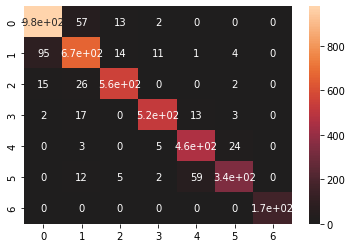


Confusion Matrix: 

 [[977  57  13   2   0   0   0]
 [ 95 668  14  11   1   4   0]
 [ 15  26 555   0   0   2   0]
 [  2  17   0 522  13   3   0]
 [  0   3   0   5 463  24   0]
 [  0  12   5   2  59 343   0]
 [  0   0   0   0   0   0 171]]


In [ ]:
y_pred_FS = FS_Model.predict(FS_X_test)
CM_FS = confusion_matrix(FS_y_test, y_pred_FS)

sns.heatmap(CM_FS, center=True, annot=True)
plt.show()

print('\nConfusion Matrix: \n\n', CM_FS)

###**Principal Component Analysis**

In [ ]:
new_y = np.array([y])
new_y

array([[2, 2, 2, ..., 0, 0, 0]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_X = sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 16)
principal_components = pca.fit_transform(new_X)
PCA_X = pd.DataFrame(data = principal_components, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16'])
# PCA_X = pd.DataFrame(data = principal_components, columns=['pca1','pca2','pca3'])
PCA_X_train,PCA_X_test,PCA_y_train,PCA_y_test = train_test_split(PCA_X,y,train_size=0.7,shuffle=True)

In [ ]:
PCA_X_train.shape

(9527, 16)

In [ ]:
PCA_X_test.shape

(4084, 16)

In [ ]:
PCA_Model = classifier(PCA_X_train,PCA_y_train,PCA_X_test,PCA_y_test)

print("Training score: ",PCA_Model.score(PCA_X_train,PCA_y_train)*100)
print("Testing score: ",PCA_Model.score(PCA_X_test,PCA_y_test)*100)

Training score:  97.56481578671145
Testing score:  93.1439764936337


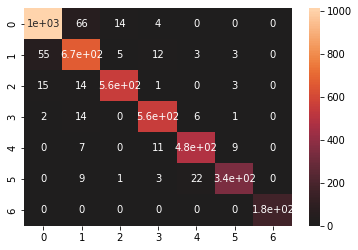


Confusion Matrix:

 [[1013   66   14    4    0    0    0]
 [  55  671    5   12    3    3    0]
 [  15   14  558    1    0    3    0]
 [   2   14    0  558    6    1    0]
 [   0    7    0   11  484    9    0]
 [   0    9    1    3   22  345    0]
 [   0    0    0    0    0    0  175]]


In [ ]:
y_pred_PCA = PCA_Model.predict(PCA_X_test)
CM_PCA = confusion_matrix(PCA_y_test,y_pred_PCA)

sns.heatmap(CM_PCA,center=True,annot=True)
plt.show()

print("\nConfusion Matrix:\n\n",CM_PCA)

### **Class Prediction**

In [ ]:
X = beans.iloc[:,0:16].values

In [ ]:
# new_data = np.array([[41468,760.467,287.5059106,183.8840322,1.563517545,0.7687216441,41863,229.7796715,0.7769034772,0.9905644603,0.9010776302,0.7992172091,0.00693319935,0.001744908898,0.6387481474,0.9986939355]])
new_data = np.array([[29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066]])
new_data = np.concatenate((X,new_data))
new_data = sc.fit_transform(new_data)
principal_components = pca.fit_transform(new_data)
new_data = pd.DataFrame(data = principal_components, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16'])
new_data = new_data.iloc[:,0:16].values
new_data = np.array([new_data[-1]])
new_data

array([[-4.75771076e+00,  1.82634850e+00,  5.13937044e-01,
        -1.25844320e-01,  1.31416794e-01,  2.08680831e-01,
         5.99521724e-01, -1.61983162e-01, -2.12045513e-01,
        -2.42616942e-02, -1.10825835e-02,  3.75742792e-02,
        -2.93656181e-02,  9.77629114e-04, -2.48649079e-03,
        -2.07796774e-04]])

In [ ]:
pred_val = PCA_Model.predict(new_data)
pred_val

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
class_ = {'DERMASON':0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6}
for key in class_ :
  if pred_val[0] == class_[key]:
    print("The dry bean belongs to the class:",key)

The dry bean belongs to the class: SEKER
